In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
test.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [9]:
passid1= test['Id']

In [10]:
train = pd.concat([df, test], axis=0).reset_index(drop=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
train.isnull().sum()[(train.isnull().sum()>0)]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [13]:
train.nunique()[train.nunique()>10]

Id               2919
MSSubClass         16
LotFrontage       128
LotArea          1951
Neighborhood       25
YearBuilt         118
YearRemodAdd       61
Exterior1st        15
Exterior2nd        16
MasVnrArea        444
BsmtFinSF1        991
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea        1292
TotRmsAbvGrd       14
GarageYrBlt       103
GarageArea        603
WoodDeckSF        379
OpenPorchSF       252
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
PoolArea           14
MiscVal            38
MoSold             12
SalePrice         663
dtype: int64

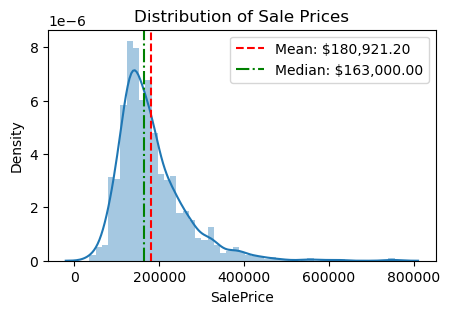

In [14]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Sale Prices")
dist = sns.distplot(train['SalePrice'], norm_hist=False)

mean_price = train['SalePrice'].mean()
median_price = train['SalePrice'].median()
plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: ${mean_price:,.2f}')
plt.axvline(median_price, color='g', linestyle='-.', label=f'Median: ${median_price:,.2f}')
plt.legend()
plt.show()

In [15]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


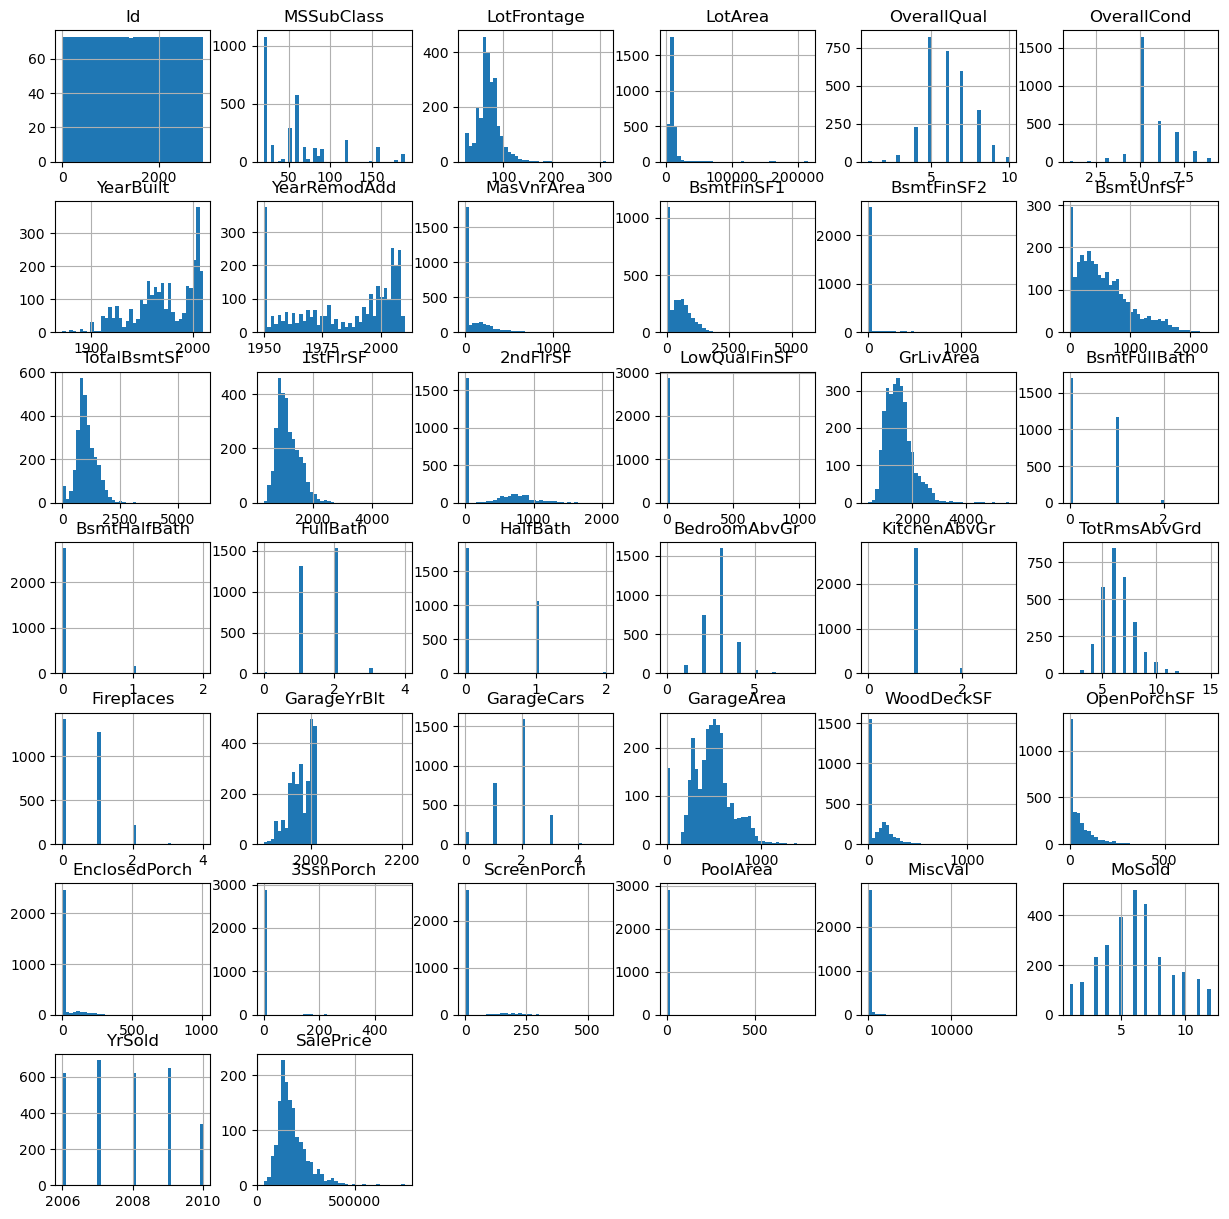

In [16]:
# EDA
train.hist(bins=40, figsize=(15,15)) #plot numberic chart
plt.show()

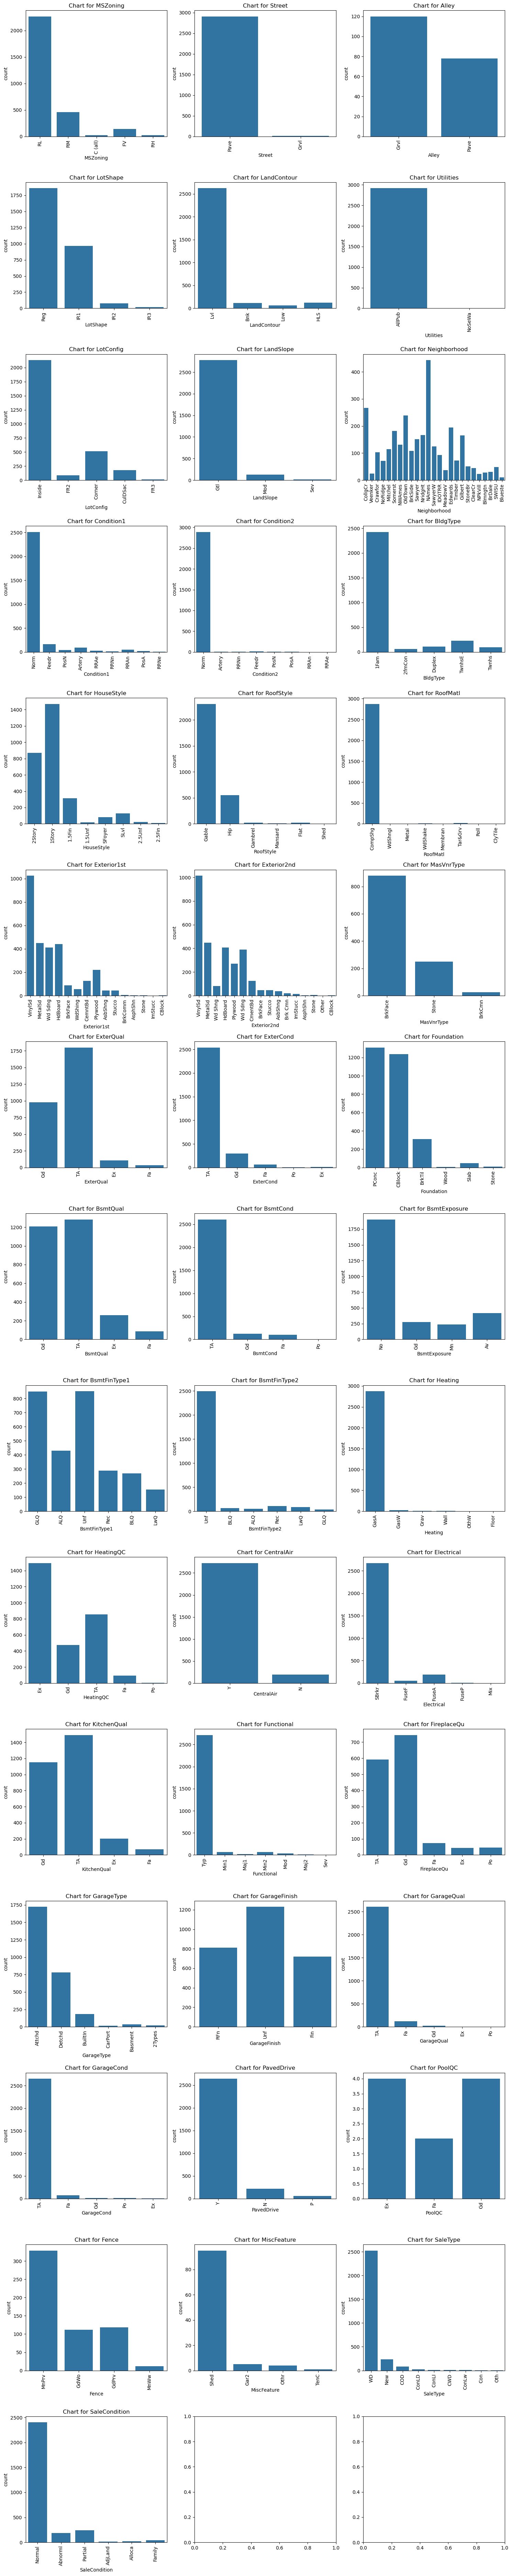

In [17]:
# Plot each categorical charts
cat_cols = train.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(cat_cols) // 3 + (len(cat_cols) % 3 > 0)  # Adjust for odd number of columns
num_cols = min(len(cat_cols), 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Plot each categorical variable
for i, col in enumerate(cat_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Chart for {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


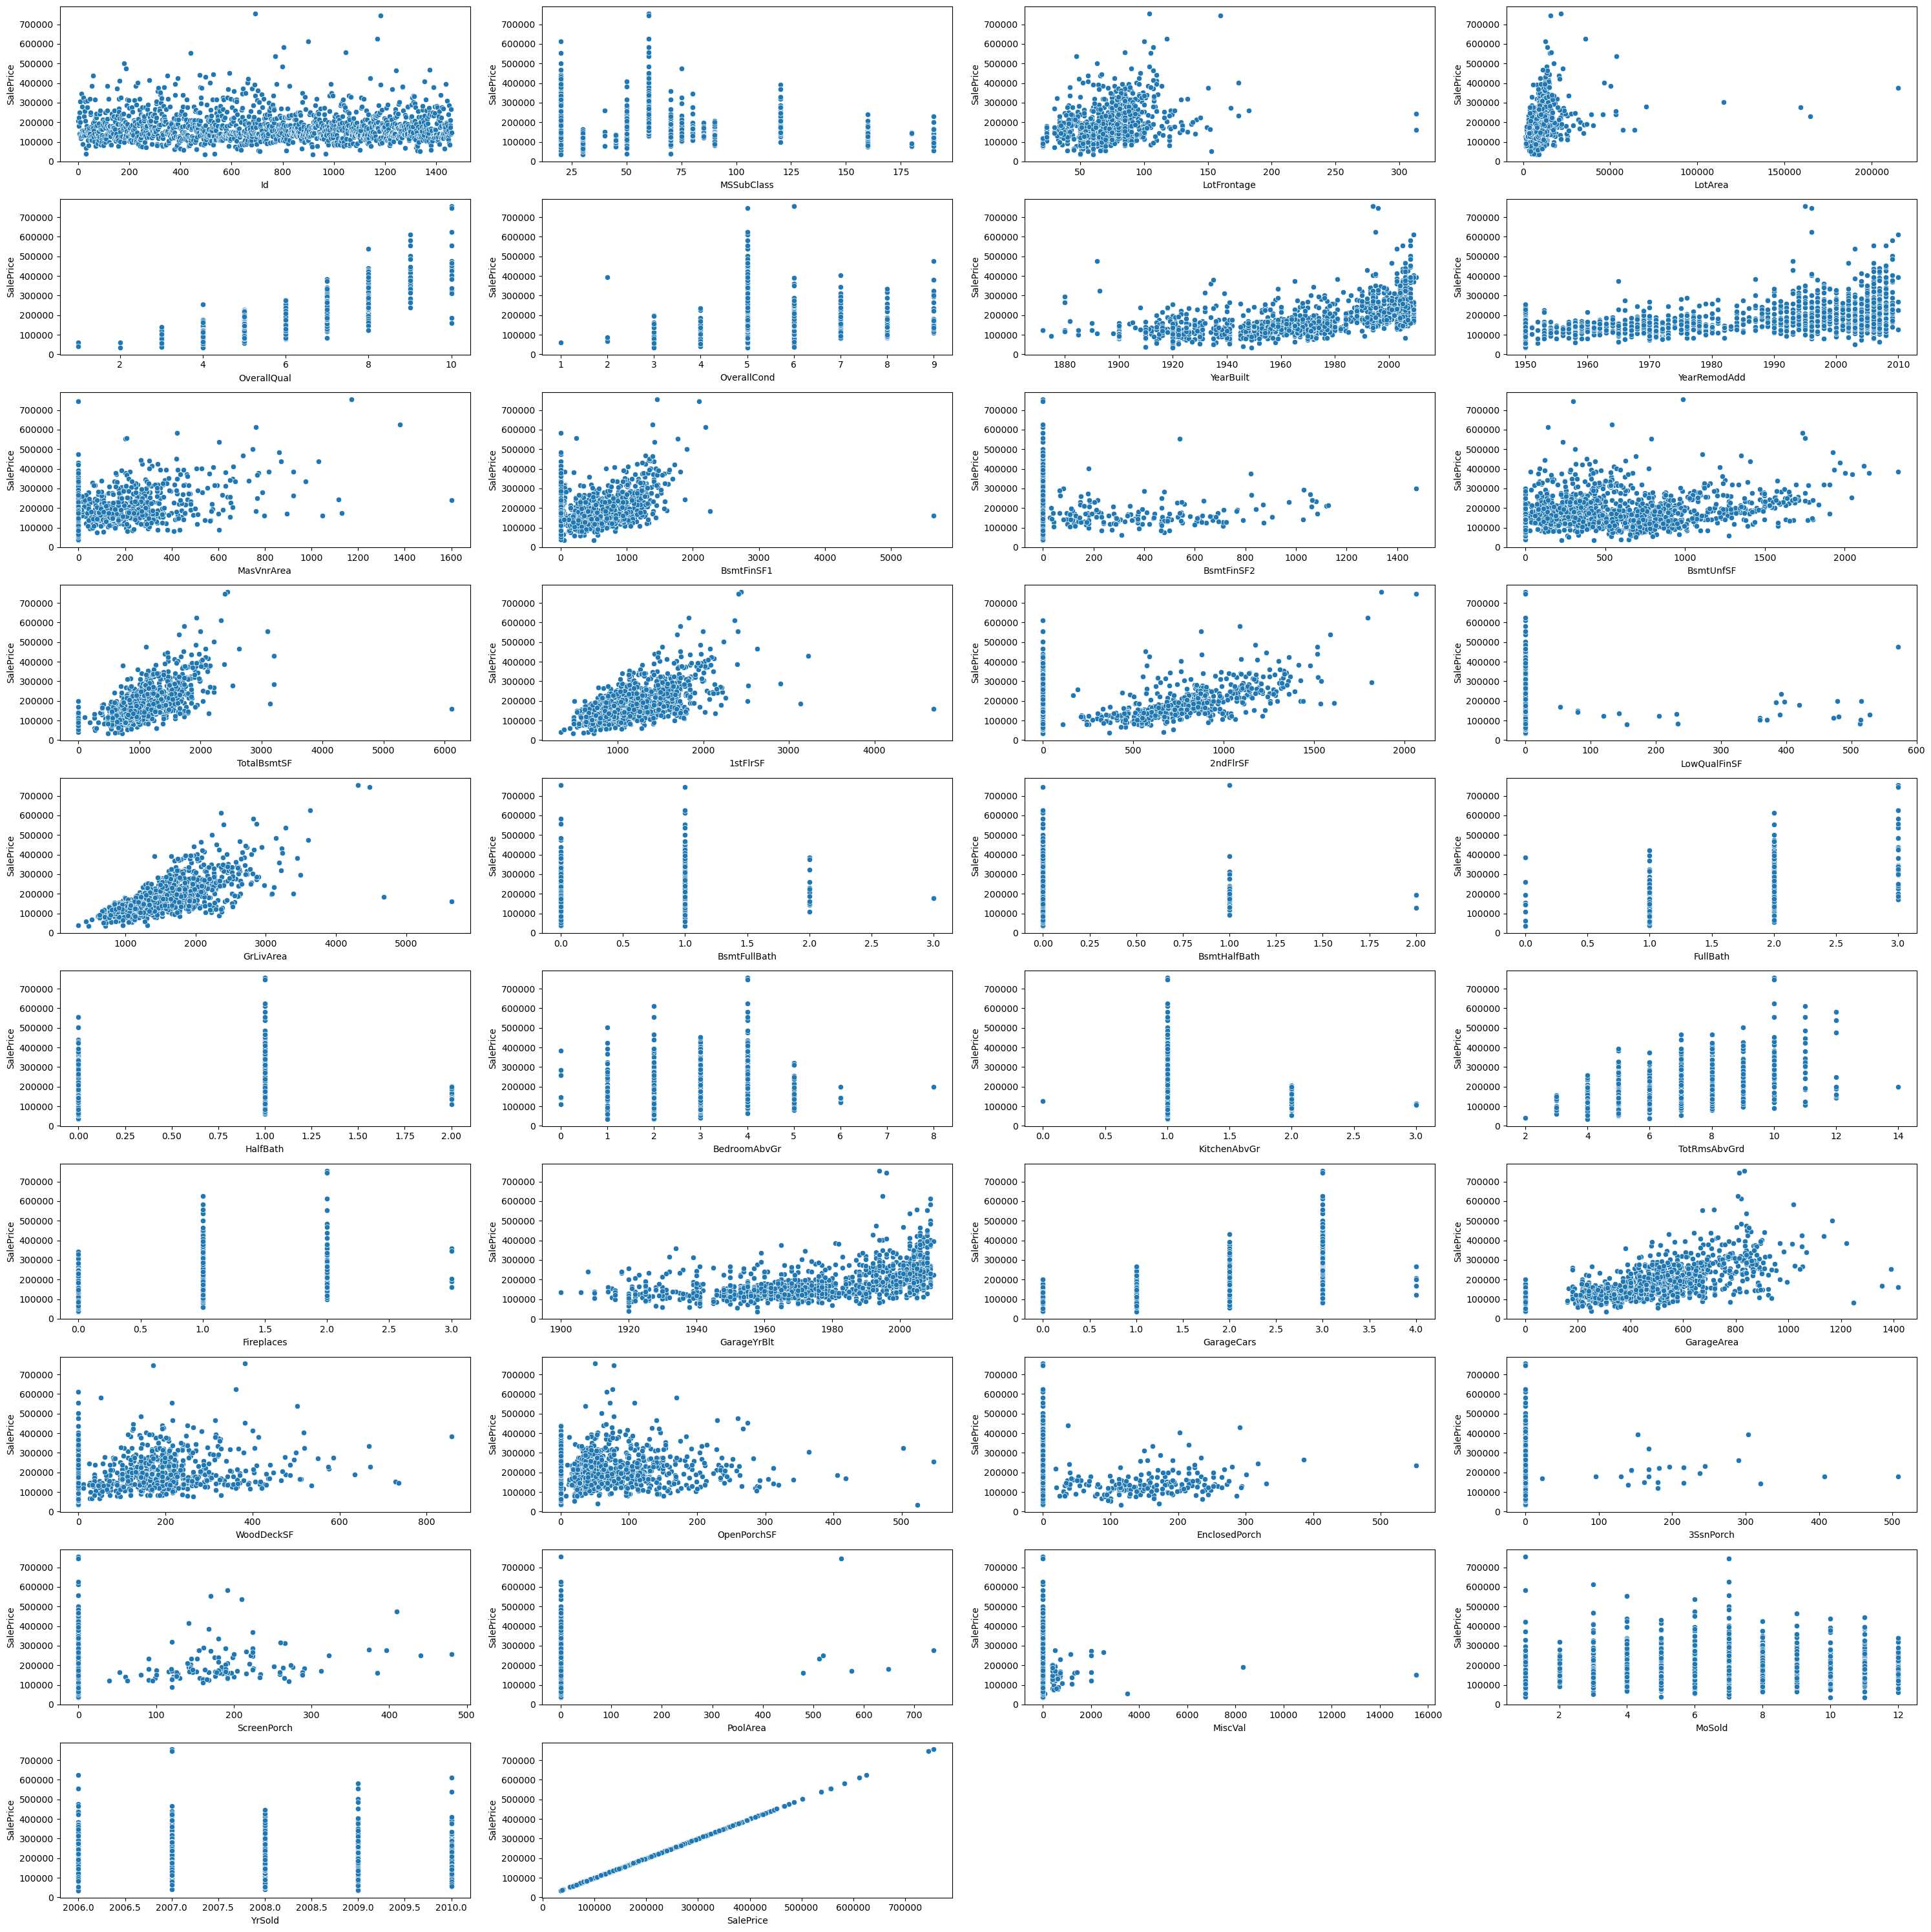

In [18]:
numcolumn = train.select_dtypes(exclude=['object'])

plt.figure(figsize=(30,30))
for index in range(len(numcolumn.columns)):
    plt.subplot(10,4,index+1)
    sns.scatterplot(data=numcolumn, x=numcolumn.iloc[:,index], y='SalePrice')
plt.tight_layout()
plt.show()

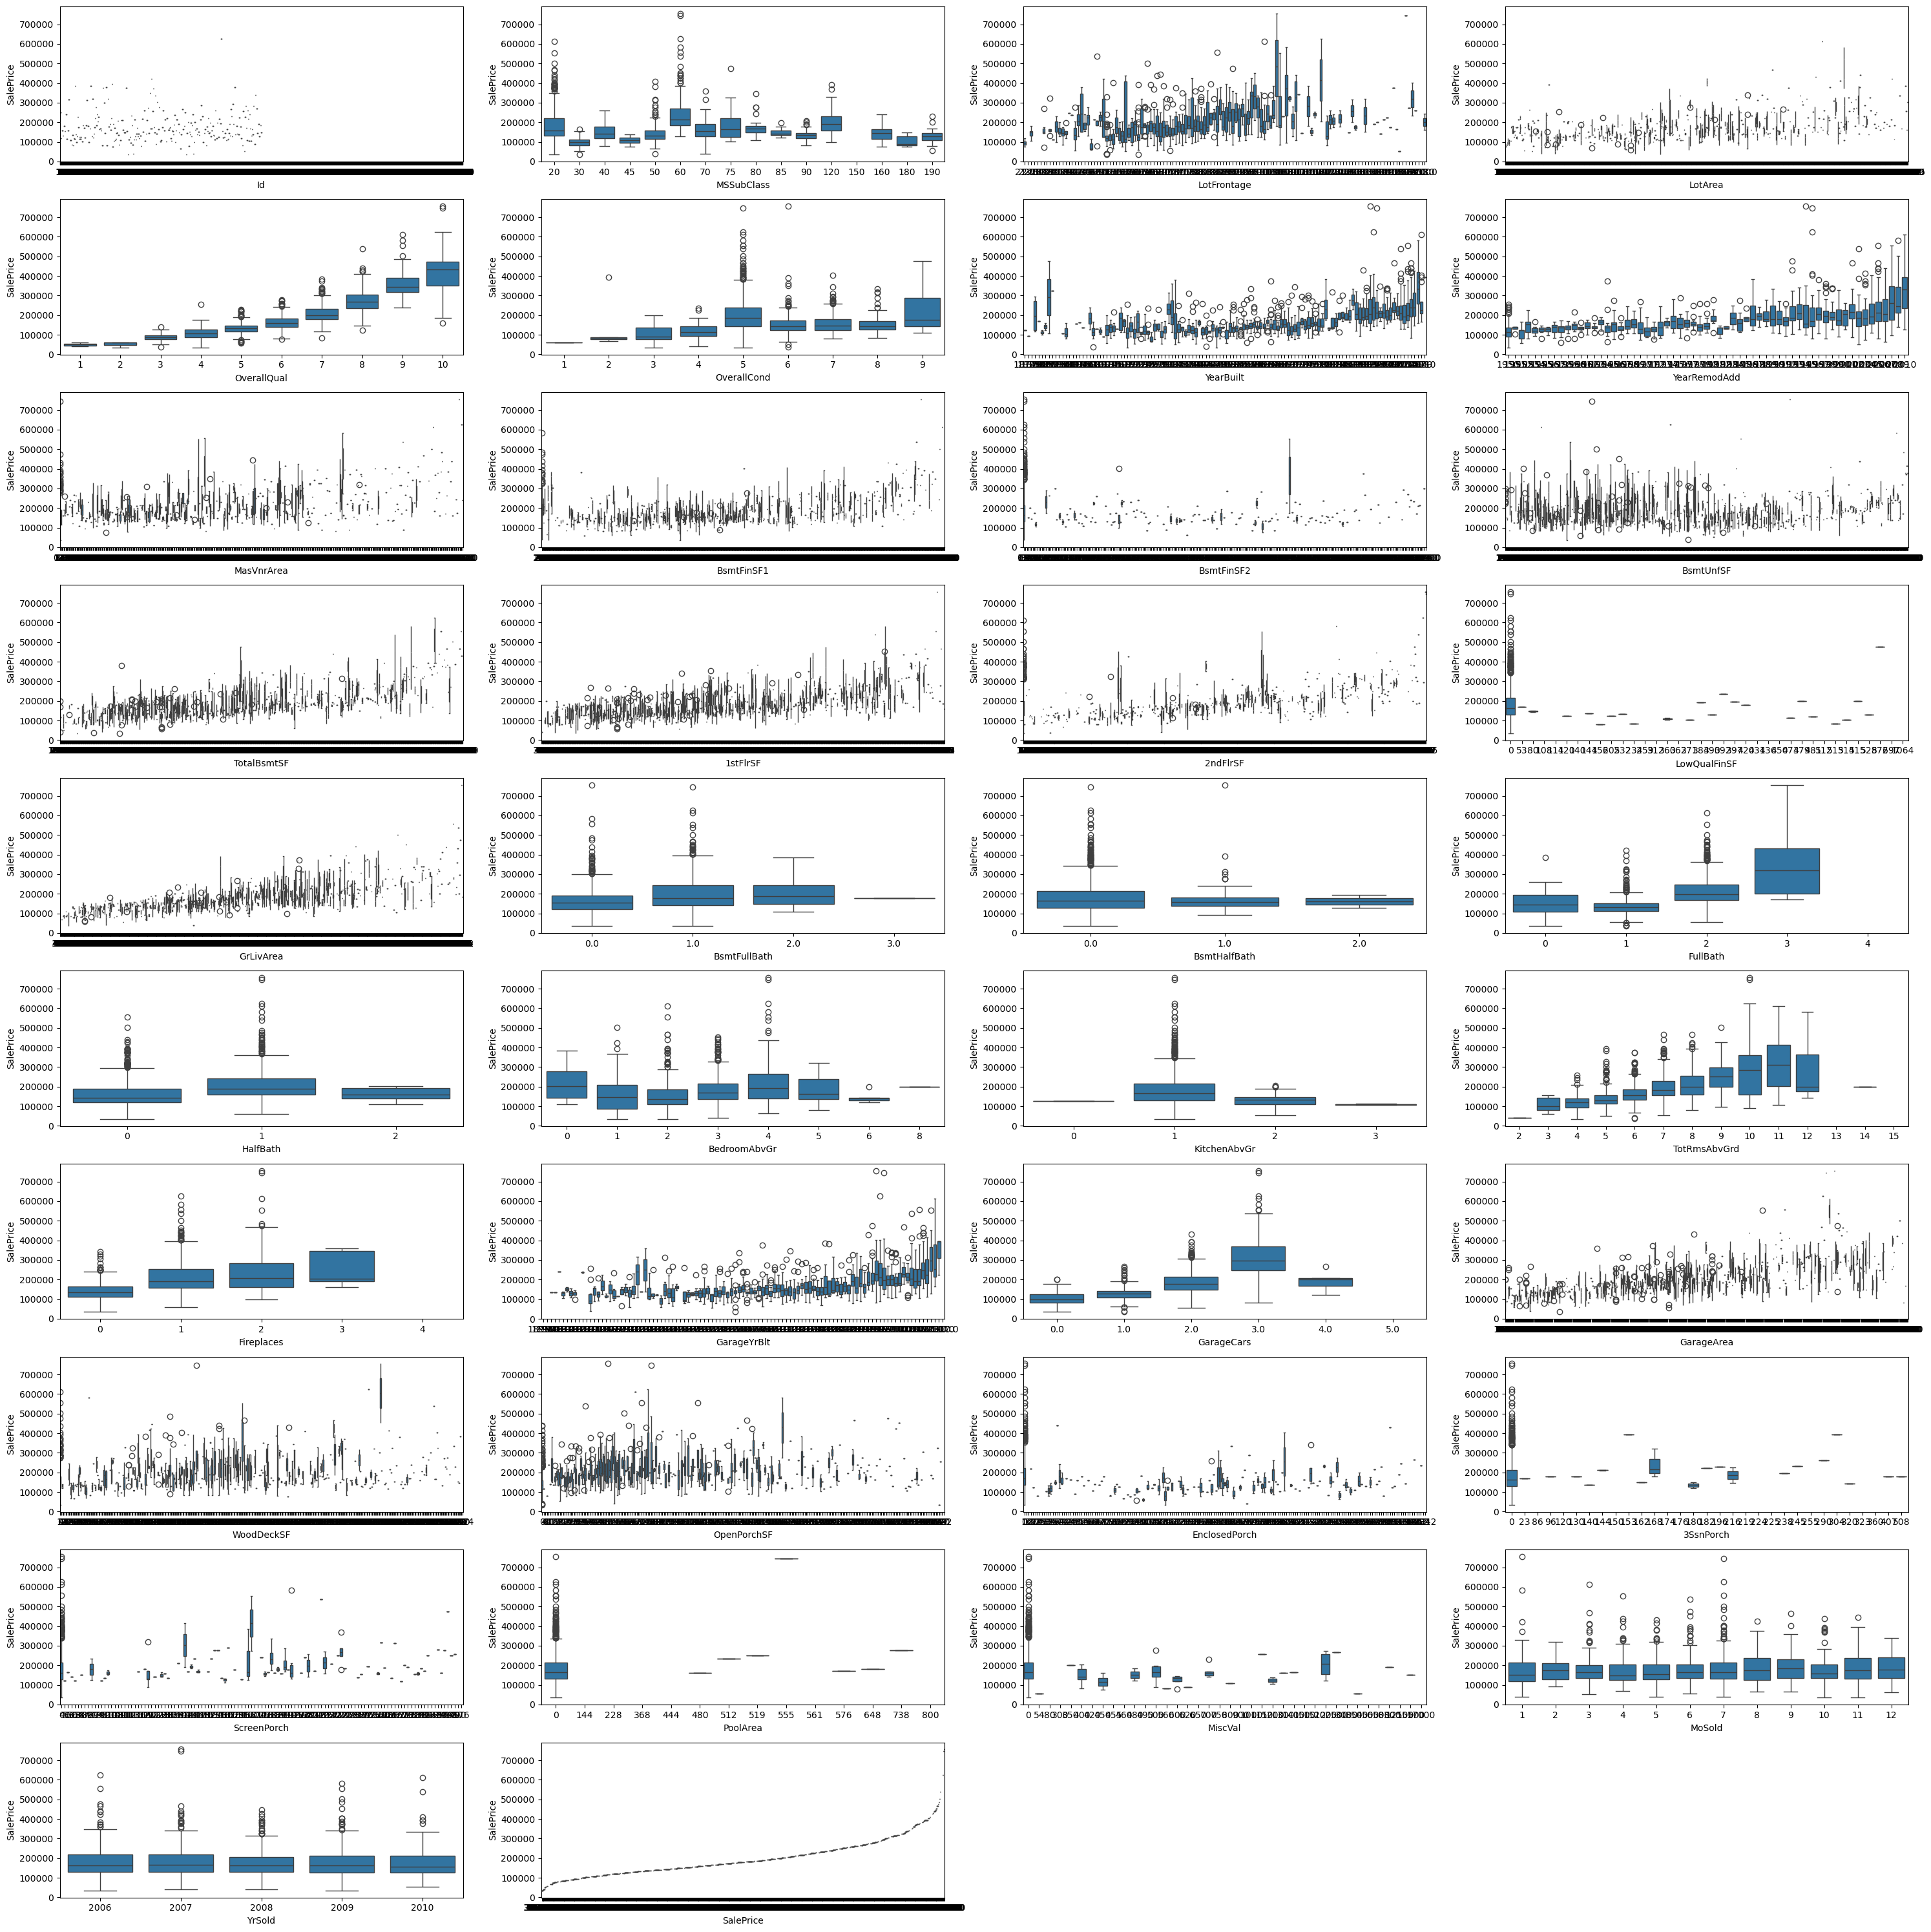

In [94]:
plt.figure(figsize=(30,30))
for index in range(len(numcolumn.columns)):
    plt.subplot(10,4,index+1)
    sns.boxplot(data=numcolumn, x=numcolumn.iloc[:,index], y='SalePrice')
plt.tight_layout()
plt.show()

In [19]:
# sorting which feature have the highest correlation to SalePrice, they will affect the prediction greatly
numcorr = numcolumn.corr()
numcorr[['SalePrice']].sort_values(['SalePrice'], ascending=False).head(15)

SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101
GarageYrBlt    0.486362
MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420

In [20]:
corr_matrix = numcolumn.corr().abs() #Multicollinearity issue

high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly correlated pairs (correlation > 0.8):", high_corr_var)

Highly correlated pairs (correlation > 0.8): [('YearBuilt', 'GarageYrBlt'), ('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GarageCars', 'GarageArea')]


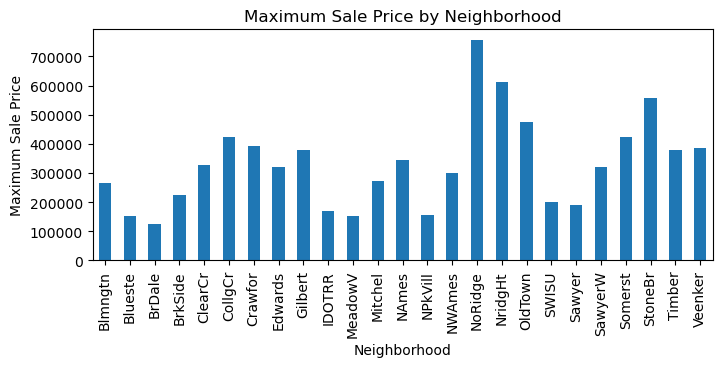

In [21]:
neighborhood_max_sale_price = train.groupby('Neighborhood')['SalePrice'].max()

neighborhood_max_sale_price.plot(kind='bar', figsize=(8, 3))
plt.title("Maximum Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Maximum Sale Price")
plt.xticks(rotation=90)
plt.show() #NoRidge have the highest SalePrice

In [22]:
# Group by 'Neighborhood' and then locate the NoRidge group
NoRidge_group = train.groupby('Neighborhood').get_group('NoRidge')

# Get the N largest values of SalePrice in the NoRidge group
largest_NoRidge = NoRidge_group['SalePrice'].nlargest(6)


NoRidge_group.loc[largest_NoRidge.index, ['Neighborhood', 'SalePrice', 'GrLivArea', 'MSSubClass','LotArea', 'TotalBsmtSF']]
# Highest SalePrice does not mean bigger GrLivArea

Neighborhood  SalePrice  GrLivArea  MSSubClass  LotArea  TotalBsmtSF
691       NoRidge   755000.0       4316          60    21535       2444.0
1182      NoRidge   745000.0       4476          60    15623       2396.0
1169      NoRidge   625000.0       3627          60    35760       1930.0
1373      NoRidge   466500.0       2633          20    11400       2633.0
496       NoRidge   430000.0       3228          20    12692       3200.0
1353      NoRidge   410000.0       3238          50    14720       2033.0

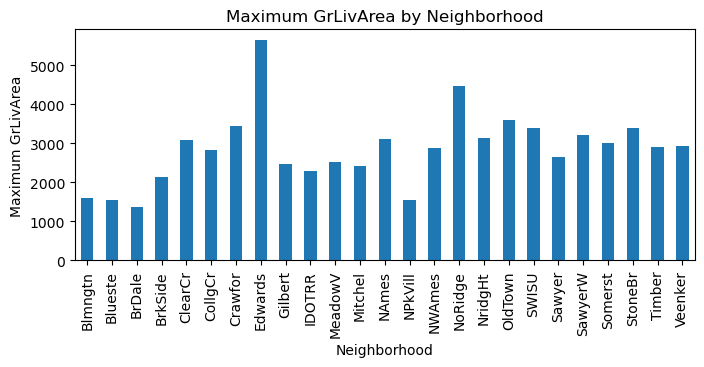

In [23]:
neighborhood_max_GrLivArea = train.groupby('Neighborhood')['GrLivArea'].max()

neighborhood_max_GrLivArea.plot(kind='bar', figsize=(8, 3))
plt.title("Maximum GrLivArea by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Maximum GrLivArea")
plt.xticks(rotation=90)
plt.show() # Edward have the biggest Living area

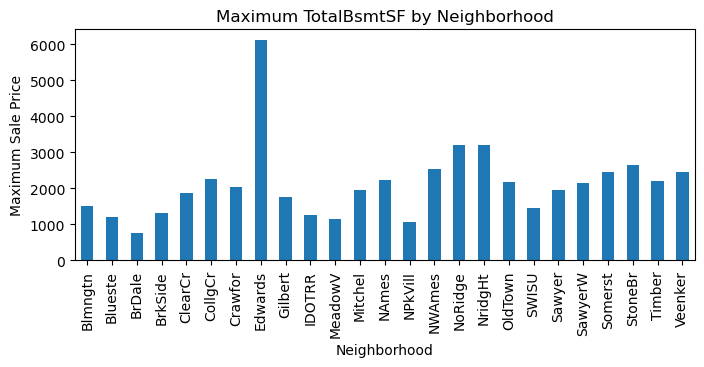

In [24]:
neighborhood_max_sale_price = train.groupby('Neighborhood')['TotalBsmtSF'].max()

neighborhood_max_sale_price.plot(kind='bar', figsize=(8, 3))
plt.title("Maximum TotalBsmtSF by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Maximum Sale Price")
plt.xticks(rotation=90)
plt.show() #Edwards have the highest TotalBsmtSF

In [25]:
# Group by 'Neighborhood' and then locate the 'Edwards' group
edwards_group = train.groupby('Neighborhood').get_group('Edwards')

# Get the N largest values of GrLivArea in the 'Edwards' group
largest_GrLivArea = edwards_group['GrLivArea'].nlargest(10)


edwards_group.loc[largest_GrLivArea.index, ['Neighborhood', 'GrLivArea', 'MSSubClass','LotArea', 'TotalBsmtSF','BsmtFinSF1',
                                            'BsmtUnfSF', 'BsmtFinSF2',  'SalePrice', '1stFlrSF', '2ndFlrSF']]

# TotalBsmtSF= BsmtFinSF1 + BsmtUnfSF + BsmtFinSF2
# GrLivArea= 1stFlrSF + 2ndFlrSF 
# Highest GrLivArea does not mean highest SalePrice, seem to have issue

Neighborhood  GrLivArea  MSSubClass  LotArea  TotalBsmtSF  BsmtFinSF1  \
1298      Edwards       5642          60    63887       6110.0      5644.0   
2549      Edwards       5095          20    39290       5095.0      4010.0   
523       Edwards       4676          60    40094       3138.0      2260.0   
2188      Edwards       3820          20    47007          0.0         0.0   
2822      Edwards       3672          75    19800       1836.0       425.0   
2863      Edwards       2314          60    11060       1150.0         0.0   
2547      Edwards       2233          90     9555          0.0         0.0   
1423      Edwards       2201          80    19690        697.0         0.0   
921       Edwards       2200          90     8777       1272.0      1084.0   
175       Edwards       2158          20    12615       1202.0       477.0   

      BsmtUnfSF  BsmtFinSF2  SalePrice  1stFlrSF  2ndFlrSF  
1298      466.0         0.0   160000.0      4692       950  
2549     1085.0         0.0        NaN      5095         0  
523       878.0         0.0   184750.0      3138      1538  
2188        0.0         0.0        NaN      3820         0  
2822     1411.0         0.0        NaN      1836      1836  
2863     1150.0         0.0        NaN      1164      1150  
2547        0.0         0.0        NaN      1100      1133  
1423      697.0         0.0   274970.0      1575       626  
921       188.0         0.0   145900.0      1272       928  
175       725.0         0.0   243000.0      2158         0

In [26]:
edwards_group['TotalBsmtSF'].nlargest(5) # Highest TotalBsmtSF = Highest GivLivArea

1298    6110.0
2549    5095.0
523     3138.0
2822    1836.0
2823    1776.0
Name: TotalBsmtSF, dtype: float64

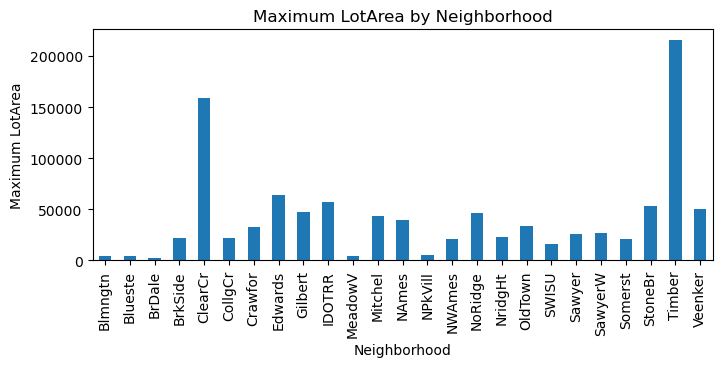

In [27]:
neighborhood_max_GrLivArea = train.groupby('Neighborhood')['LotArea'].max()

neighborhood_max_GrLivArea.plot(kind='bar', figsize=(8, 3))
plt.title("Maximum LotArea by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Maximum LotArea")
plt.xticks(rotation=90)
plt.show() # Timber have the biggest LotArea

In [28]:
# Group by 'Neighborhood' and then locate the Timber group
timber_group = train.groupby('Neighborhood').get_group('Timber')

# Get the N largest values of SalePrice in the Timber group
largest_LotArea_sf = timber_group['LotArea'].nlargest(10)


timber_group.loc[largest_LotArea_sf.index, ['Neighborhood', 'LotArea','SalePrice', 'GrLivArea', 'TotalBsmtSF']]
# Having largest LotArea does not mean higher price, seem a bit out as the value is bigger than normal

Neighborhood  LotArea  SalePrice  GrLivArea  TotalBsmtSF
313        Timber   215245   375000.0       2036       2136.0
335        Timber   164660   228950.0       1786       1499.0
1396       Timber    57200   160000.0       1687        747.0
2900       Timber    50102        NaN       1650       1632.0
1184       Timber    35133   186700.0       1572       1572.0
692        Timber    26178   335000.0       2519       1210.0
2590       Timber    19958        NaN       2279        585.0
2232       Timber    18265        NaN       1256       1256.0
41         Timber    16905   170000.0       1328       1350.0
169        Timber    16669   228000.0       1707       1686.0

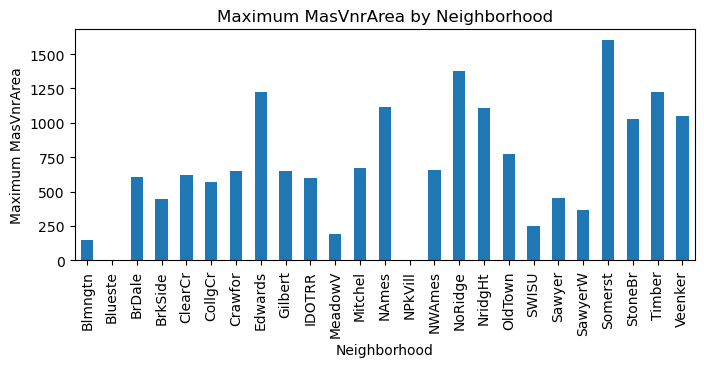

In [29]:
neighborhood_max_GrLivArea = train.groupby('Neighborhood')['MasVnrArea'].max()

neighborhood_max_GrLivArea.plot(kind='bar', figsize=(8, 3))
plt.title("Maximum MasVnrArea by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Maximum MasVnrArea")
plt.xticks(rotation=90)
plt.show() # Somerst have the biggest MasVnrArea

In [30]:
# Group by 'Neighborhood' and then locate the Somerst group
Somerst_group = train.groupby('Neighborhood').get_group('Somerst')

# Get the N largest values of SalePrice in the Somerst group
largest_LotArea_sf = Somerst_group['MasVnrArea'].nlargest(10)


Somerst_group.loc[largest_LotArea_sf.index, ['Neighborhood', 'MasVnrArea','SalePrice', 'GrLivArea', 'TotalBsmtSF','LotArea']]
# MasVnrArea 1600 seem like a outlier

Neighborhood  MasVnrArea  SalePrice  GrLivArea  TotalBsmtSF  LotArea
297       Somerst      1600.0   239000.0       1950        975.0     7399
1500      Somerst      1159.0        NaN       1512        756.0     2980
115       Somerst      1129.0   176000.0       1458        729.0     3230
755       Somerst       894.0   172500.0       1471        729.0     3230
105       Somerst       768.0   250000.0       1992       1053.0     9375
2339      Somerst       754.0        NaN       1966       1966.0    12291
623       Somerst       513.0   168500.0       1512        756.0     2117
1741      Somerst       513.0        NaN       1512        756.0     2998
2034      Somerst       513.0        NaN       1789        858.0    10646
2714      Somerst       513.0        NaN       1524        756.0     2998

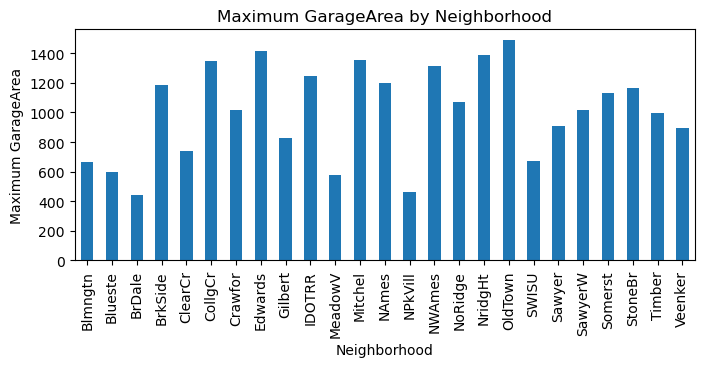

In [31]:
neighborhood_max_GrLivArea = train.groupby('Neighborhood')['GarageArea'].max()

neighborhood_max_GrLivArea.plot(kind='bar', figsize=(8, 3))
plt.title("Maximum GarageArea by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Maximum GarageArea")
plt.xticks(rotation=90)
plt.show() # OldTown have the biggest GarageArea

In [32]:
# Group by 'Neighborhood' and then locate the OldTown group
OldTown_group = train.groupby('Neighborhood').get_group('OldTown')

# Get the N largest values of SalePrice in the OldTown group
largest_LotArea_sf = OldTown_group['GarageArea'].nlargest(10)


OldTown_group.loc[largest_LotArea_sf.index, ['Neighborhood', 'GarageArea','SalePrice', 'GrLivArea', 'TotalBsmtSF','LotArea', 
                                             'MasVnrArea']]
# GarageArea look fine

Neighborhood  GarageArea  SalePrice  GrLivArea  TotalBsmtSF  LotArea  \
2071      OldTown      1488.0        NaN       1436        892.0    10836   
2753      OldTown      1008.0        NaN       2640       2171.0    22136   
1404      OldTown       936.0   105000.0       1214        672.0    10410   
1438      OldTown       923.0   149700.0       1236        912.0     7407   
583       OldTown       880.0   325000.0       2775       1237.0    13500   
304       OldTown       870.0   295000.0       3493       1470.0    18386   
2097      OldTown       869.0        NaN       1499        904.0     9000   
747       OldTown       864.0   265979.0       2640       1240.0    11700   
185       OldTown       840.0   475000.0       3608       1107.0    22950   
2094      OldTown       828.0        NaN       1436        884.0    10800   

      MasVnrArea  
2071         0.0  
2753         0.0  
1404         0.0  
1438         0.0  
583          0.0  
304          0.0  
2097         0.0  
747          0.0  
185          0.0  
2094         0.0

In [33]:
dominate_cat = []
for i in cat_cols:
    counts = train[i].value_counts()
    common = counts.iloc[0]
    if common / len(train) * 100 > 96:
        dominate_cat.append(i)

dominate_cat = list(dominate_cat)

print("Category columns with >96% of the same value: ", dominate_cat)

Category columns with >96% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


In [34]:
num_cols = train.select_dtypes(exclude=['object']) # why select 96 as using 95 some of features are needed.
dominate_num = []
for i in num_cols:
    counts = train[i].value_counts()
    common = counts.iloc[0]
    if common / len(train) * 100 > 96:
        dominate_num.append(i)

dominate_num = list(dominate_num)

print("Numberic columns with >96% of the same value: ", dominate_num)

Numberic columns with >96% of the same value:  ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


### Data Cleaning

In [35]:
train = train.drop(dominate_cat, axis=1)# only one value dominate so drop as it is meaningless

In [36]:
train = train.drop(dominate_num, axis=1)# only one value dominate so drop as it is meaningless

In [37]:
train.drop(['Id','YearBuilt','GarageYrBlt','TotRmsAbvGrd', 'GarageCars', '1stFlrSF', '2ndFlrSF', 
           'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFinSF2'], axis=1, inplace=True)
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions), so we can drop YearBuilt
# TotalBsmtSF= BsmtFinSF1 + BsmtUnfSF + BsmtFinSF2 (correlated so can removed)
# GrLivArea= 1stFlrSF + 2ndFlrSF (correlated so can removed)


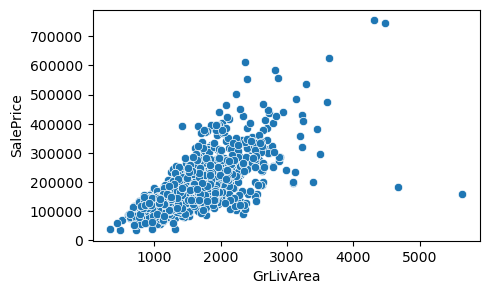

In [38]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=numcolumn, x='GrLivArea', y='SalePrice')
fig.tight_layout()
# high GrLivArea but low price seem not right

In [39]:
filter_GrLivArea = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
print(filter_GrLivArea[['GrLivArea', 'SalePrice']])

      GrLivArea  SalePrice
523        4676   184750.0
1298       5642   160000.0


In [40]:
train= train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

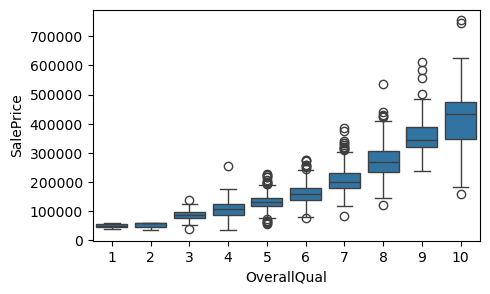

In [41]:
plt.figure(figsize=(5,3))
sns.boxplot(data=numcolumn, x='OverallQual', y='SalePrice')
fig.tight_layout()
# Low OverallQual but high price seem not right

In [42]:
filter_OverallQual = train[(train['OverallQual']<5) & (train['SalePrice']>200000)]
print(filter_OverallQual[['OverallQual', 'SalePrice']])


     OverallQual  SalePrice
457            4   256000.0


In [43]:
train= train.drop(train[(train['OverallQual'] < 5) & (train['SalePrice'] > 200000)].index)

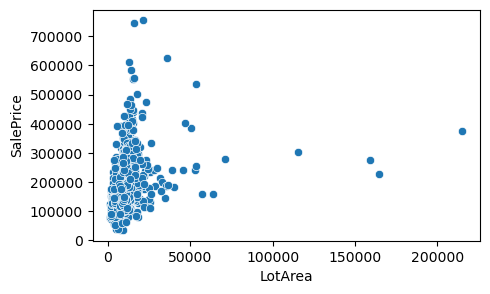

In [44]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=numcolumn, x='LotArea', y='SalePrice')
fig.tight_layout()
# LotArea big but low price seem not right

In [45]:
train['LotArea'].describe()

count      2916.000000
mean      10124.662894
std        7767.471822
min        1300.000000
25%        7475.000000
50%        9451.000000
75%       11556.000000
max      215245.000000
Name: LotArea, dtype: float64

In [46]:
filter_OverallQual = train[(train['LotArea'] > 100000) & (train['SalePrice'] < 500000)]
print(filter_OverallQual[['LotArea', 'SalePrice', 'Neighborhood']])
# the mean is about 10124, std also about 7767,so these are likely outliers

     LotArea  SalePrice Neighborhood
249   159000   277000.0      ClearCr
313   215245   375000.0       Timber
335   164660   228950.0       Timber
706   115149   302000.0      ClearCr


In [47]:
train= train.drop(train[(train['LotArea'] > 100000) & (train['SalePrice'] < 500000)].index)

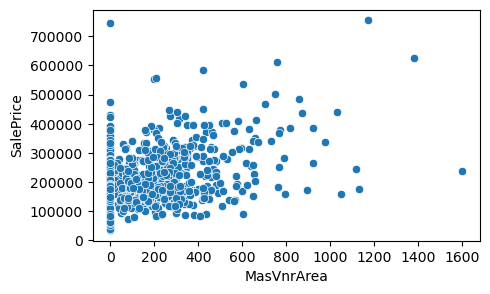

In [48]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=numcolumn, x='MasVnrArea', y='SalePrice')
fig.tight_layout()
# LotArea big but low price seem not right

In [49]:
train['MasVnrArea'].describe()

count    2889.000000
mean      101.624784
std       178.441432
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [50]:
filter_OverallQual = train[(train['MasVnrArea'] > 1200) & (train['SalePrice'] < 300000)]
print(filter_OverallQual[['MasVnrArea', 'SalePrice', 'Neighborhood']])
# the mean is about 10124, std also about 7767,so these are likely outliers

     MasVnrArea  SalePrice Neighborhood
297      1600.0   239000.0      Somerst


In [51]:
train= train.drop(train[(train['MasVnrArea'] > 1200) & (train['SalePrice'] < 300000)].index)

In [52]:
exterior1st_unique = set(train['Exterior1st'].unique())
exterior2nd_unique = set(train['Exterior2nd'].unique())

difference = exterior2nd_unique - exterior1st_unique
print("Unique values in Exterior2nd but not in Exterior1st:", difference)

Unique values in Exterior2nd but not in Exterior1st: {'CmentBd', 'Wd Shng', 'Brk Cmn', 'Other'}


In [53]:
# Extereior1st and 2nd is almost the same, except 2nd have one more other,so I drop exterior 1
train.drop(['Exterior1st'], axis=1, inplace= True) 

In [54]:
train.isnull().sum()[(train.isnull().sum()>2043)] # 2919 * -0.7= 2043, more than 70% missing value so remove

Alley          2714
PoolQC         2902
Fence          2340
MiscFeature    2808
dtype: int64

In [55]:
train.drop({'Alley','PoolQC','Fence','MiscFeature'},axis=1, inplace=True) 

In [56]:
train.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage_mean').head()

Neighborhood  LotFrontage_mean
0      Blmngtn         46.900000
1      Blueste         27.300000
2       BrDale         21.500000
3      BrkSide         55.789474
4      ClearCr         88.150000

In [57]:
train.groupby('Neighborhood')['GarageArea'].mean().reset_index(name='GarageArea_mean').head()

Neighborhood  GarageArea_mean
0      Blmngtn       492.928571
1      Blueste       485.200000
2       BrDale       292.000000
3      BrkSide       313.981481
4      ClearCr       470.609756

In [58]:
train.groupby('MSSubClass')['MSZoning'].agg(lambda x: x.mode().iloc[0]).reset_index(name='MSZoning_mode').head()

MSSubClass MSZoning_mode
0          20            RL
1          30            RM
2          40            RL
3          45            RM
4          50            RL

In [59]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean())) #fillna with mean
train['GarageArea'] = train.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
train['MSZoning'] = train.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [60]:
# numeric value use mean as only one or two NA
col_fillmean = ['TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

for col in col_fillmean:
    train[col] = train[col].fillna(train[col].mean())

In [61]:
# those that are missing value that have dominant value and object use mode to fill NA
col_fillna = ['Exterior2nd', 'TotalBsmtSF', 
              'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
              'SaleType', 'MasVnrArea', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'GarageType',
              'GarageQual', 'GarageCond', 'GarageFinish','BsmtFinType1', 'SaleType', 'BsmtQual',
             'BsmtCond', 'BsmtFinType1',  'Electrical', 'FireplaceQu']

for col in col_fillna:
    train[col] = train[col].fillna(train[col].mode().iloc[0])

In [62]:
train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [63]:
train['MasVnrType'] = train['MasVnrType'].fillna(0) # None also treated as NA so I manually place as 0, actual NA only 8

In [64]:
train.isnull().sum()[(train.isnull().sum()>0)]

SalePrice    1459
dtype: int64

In [65]:
# convert as category is better than number as they are not continuous data
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [66]:
map_codes = {
    
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd' : 1,'NA': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'CentralAir': {'Y': 1, 'N': 0},
    'LotShape': {'Reg': 4, 'IR1':3, 'IR2': 2, 'IR3': 1},
    'PavedDrive': { "Y": 3, "P": 2, "N": 1},
    'LandContour': {"Lvl": 4, "Bnk": 3, "HLS": 2, "Low": 1},
    'Functional': {"Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0},
    'LotConfig': {"Inside": 5, "Corner": 4, "CulDSac": 3, "FR2": 2, "FR3": 1},
    'Condition1': {"Artery": 9, "Feedr": 8, "Norm": 7, "RRNn": 6, "RRAn": 5, "PosN": 4, "PosA": 3, "RRNe": 2,"RRAe": 1},
    'BldgType': {"1Fam": 5, "2FmCon": 4, "Duplx": 3, "TwnhsE": 2, "TwnhsI": 1},
    'HouseStyle': {"1Story": 1, "1.5Fin": 1.5, "1.5Unf": 1, "2Story": 2, "2.5Fin": 2.5, "2.5Unf": 2, "SFoyer": 3, 
                   "SLvl": 4}, 
    'RoofStyle': {"Flat": 1, "Gable": 2, "Gambrel":3, "Hip": 4, "Mansard": 5, "Shed": 6},
    'Electrical': {"SBrkr": 4, "FuseA": 3, "FuseF": 2, "FuseP": 1, "Mix": 2.5},
    'FireplaceQu': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2,"Po": 1,"NA": 0},
    'HeatingQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2,"Po": 1,"NA": 0},
    'MasVnrType': {"BrkCmn": 4, "BrkFace": 3, "CBlock": 2, "None": 0, "Stone": 1}
    
       }
for feature, match in map_codes.items():
    train[feature] = train[feature].replace(match)

In [67]:
train['TotalGarageQua'] = train['GarageQual'] * train['GarageCond'] * train['GarageFinish'] * train['GarageType']
train['Total_Hse_Qual'] = train['OverallQual'] * train['OverallCond']
train['Total_Bathrooms'] = train['FullBath'] + (0.5 * train['HalfBath']) * train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath'])
train['Total_Porch_sf'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
train['BsmtGradeType1'] = train['BsmtFinType1'] + train['BsmtQual'] + train['BsmtCond'] + train['BsmtExposure']
train['BsmtGradeType2'] = train['BsmtFinType2'] + train['BsmtQual'] + train['BsmtCond'] + train['BsmtExposure']    
train['TotalExtQua'] = train['ExterQual'] * train['ExterCond']
train['KitchenGrade'] = train['KitchenQual'] * train['KitchenAbvGr']
train['FireplaceGrade'] = train['FireplaceQu'] * train['Fireplaces']

In [68]:
train.drop({'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'FullBath', 'HalfBath', 'GarageQual', 'GarageCond', 
            'GarageFinish', 'GarageType', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 
            'WoodDeckSF', 'KitchenQual', 'KitchenAbvGr', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'FireplaceQu','Fireplaces'
           },axis=1, inplace=True)

In [69]:
nums = train.select_dtypes(exclude=['object'])

def logs(df, cols):
    df = df.assign(**{f'{col}_log': np.log1p(df[col]) for col in cols})
    df.drop(cols, axis=1, inplace=True)
    return df

skewness = nums.apply(lambda x: skew(x)) #skew all the numberic to get their skew value
skewness = skewness[abs(skewness) > 0.5] # filter those that are greater or less than 0.5, abs is absolute
print(str(skewness.shape[0]) + " skewed numerical features to log transform") # show the number of rows

train = logs(train, skewness.index)

23 skewed numerical features to log transform


In [70]:
cat_cols = train.select_dtypes(include=['object']).columns

In [71]:
cat_cols

Index(['MSSubClass', 'MSZoning', 'LandSlope', 'Neighborhood', 'BldgType',
       'Exterior2nd', 'Foundation', 'SaleType', 'SaleCondition'],
      dtype='object')

In [72]:
train= pd.get_dummies(data=train, columns= cat_cols)

In [73]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [74]:
test= train[train['SalePrice'].isna()] # test data 

In [75]:
test= test.drop(['SalePrice'], axis=1)

In [76]:
train = train.dropna(subset=['SalePrice']) # train data

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1459
Columns: 123 entries, YearRemodAdd to SaleCondition_Partial
dtypes: bool(91), float64(25), int64(7)
memory usage: 503.4 KB


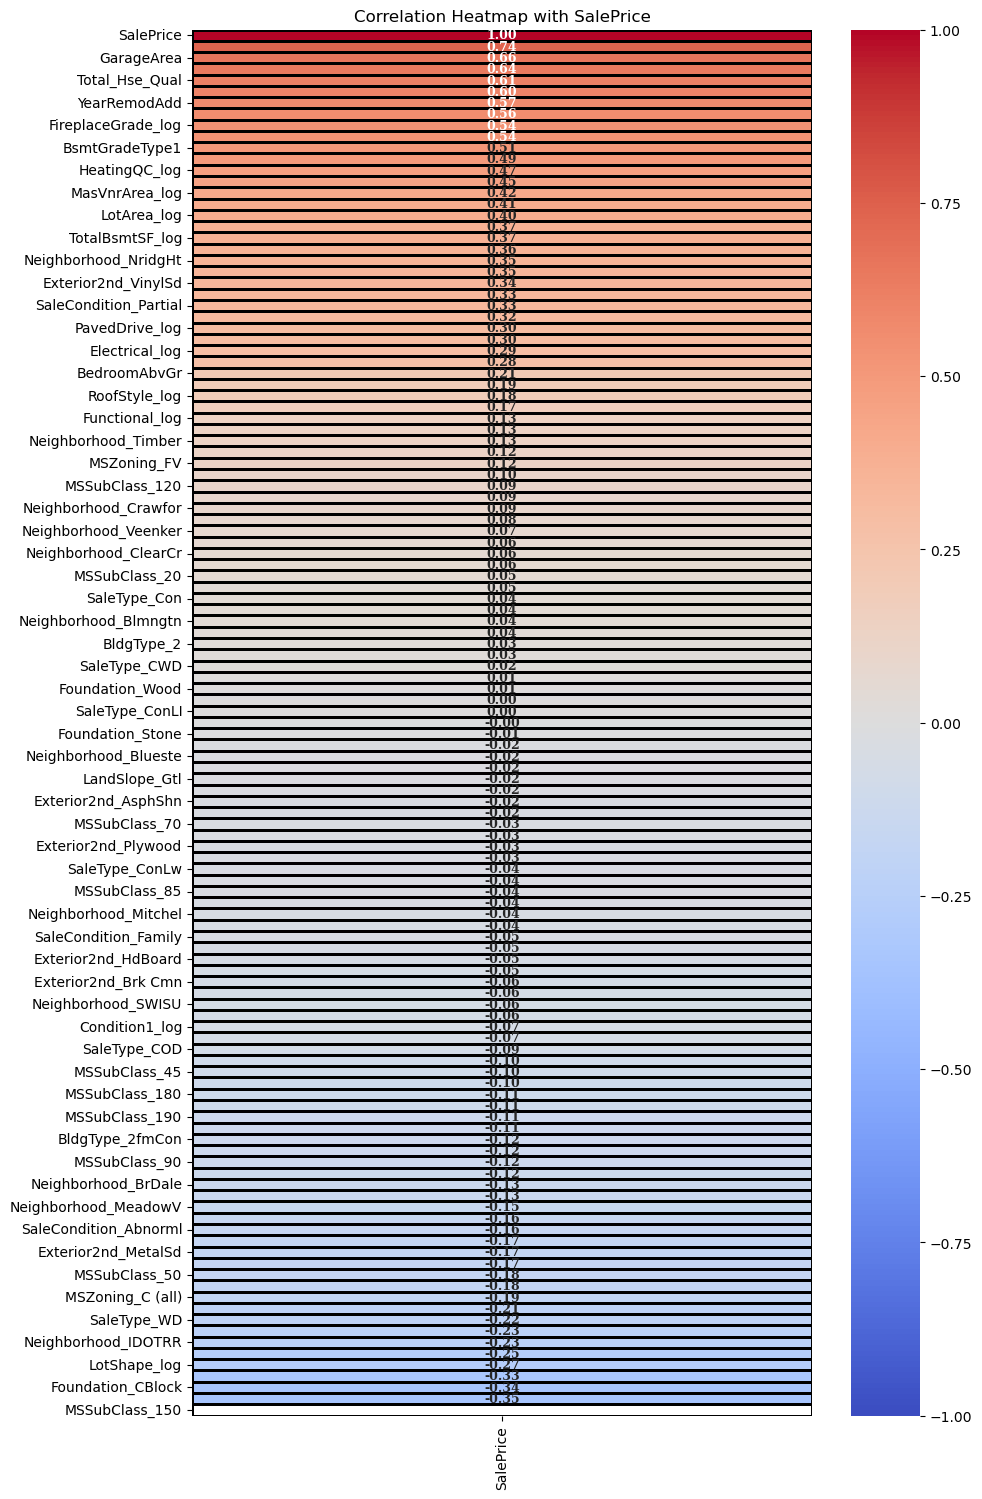

In [78]:
corr_matrix = train.corr()

saleprice_corr = corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(10, 18))
sns.heatmap(saleprice_corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True,
            fmt='.2f', annot_kws={"fontsize":9,"fontweight":"bold","fontfamily":"serif"}, 
            linewidth=1, linecolor="black")

plt.xticks(rotation=90)
plt.title('Correlation Heatmap with SalePrice')
plt.show()

In [79]:
train.drop('MSSubClass_150', axis= 1, inplace= True) 
#'MSSubClass_150' is blank so remove

### Model development

In [80]:
y = train['SalePrice']
X= train.drop('SalePrice', axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
lasso_regressor = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=14))
rf_regressor = RandomForestRegressor()
xgb_regressor = XGBRegressor()
catboost_regressor = CatBoostRegressor(verbose=False)
GBoost_regressor = GradientBoostingRegressor(    
    n_estimators=3000,
    max_depth=3,
    max_features='sqrt',
    subsample=0.8,
    min_samples_leaf=15,
    min_samples_split=10,
    learning_rate=0.05,
    loss='huber',
    random_state=14)
LR_regressor = LinearRegression()
DT_regressor = DecisionTreeRegressor()
SVR_regressor = SVR()


models = {
    "Lasso Regressor": lasso_regressor,
    "Random Forest Regressor": rf_regressor,
    "XGB Regressor": xgb_regressor,
    "CatBoost Regressor": catboost_regressor,
    "Gradient Boosting Regressor": GBoost_regressor,
    "Linear Regression": LR_regressor,
    "Decision Tree Regressor": DT_regressor,
    "Support Vector Regressor": SVR_regressor,
    
}

# Define evaluation function using cross-validation
def rmsle_cv(model, X, y):
    kf = KFold(5, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse.mean()

# Define function to evaluate model on test set
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    return rmse

# Evaluate each model using cross-validation and on the test set
results = []
for name, model in models.items():
    cv_score = rmsle_cv(model, X_train, y_train)
    test_rmse = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': name,
        'CV RMSLE Score': cv_score,
        'Test RMSE': test_rmse
    })

results_df = pd.DataFrame(results)
print(results_df)
# A lower RMSLE and RMSE indicates better performance.

                         Model  CV RMSLE Score     Test RMSE
0              Lasso Regressor    1.234935e-01  1.231541e-01
1      Random Forest Regressor    1.368765e-01  1.501946e-01
2                XGB Regressor    1.419125e-01  1.513867e-01
3           CatBoost Regressor    1.229725e-01  1.214529e-01
4  Gradient Boosting Regressor    1.217963e-01  1.232692e-01
5            Linear Regression    1.873920e+11  8.986257e+08
6      Decision Tree Regressor    2.071055e-01  2.305018e-01
7     Support Vector Regressor    1.728314e-01  1.789857e-01


In [89]:
voting_regressor = VotingRegressor(estimators=[
    ('lasso', lasso_regressor),
    ('catboost', catboost_regressor),
    ('GBoost', GBoost_regressor),

])

voting_regressor.fit(X_train, y_train) # Use X_train, y_train during cross-validation and model evaluation.

y_pred = voting_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.1163309872620901


In [90]:
#Once you are confident about the model's performance, train the model on the entire dataset (without any split) 
#to leverage all the available data. This step is for making predictions on new data that the model has never seen before.
voting_regressor.fit(X, y)

VotingRegressor(estimators=[('lasso',
                             Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('lasso',
                                              Lasso(alpha=0.0005,
                                                    random_state=14))])),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x000002A9C3FA7790>),
                            ('GBoost',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       loss='huber',
                                                       max_features='sqrt',
                                                       min_samples_leaf=15,
                                                       min_samples_split=10,
                                                       n_estimators=3000,
                                                       random_state=14,
                                                       subsample=0.8))])

In [91]:
test_col = test[X.columns]
final_predictions=np.round(np.expm1(voting_regressor.predict(test_col)),2)
#(np.expm1 is to revert the log transformation we did earlier)

In [92]:
final_predictions

array([127898.32, 158244.79, 187985.75, ..., 160027.11, 122785.23,
       216222.98])

In [93]:
result = pd.DataFrame({'Id': passid1, 'SalePrice': final_predictions}) 
result.to_csv('Submission.csv', index=False) 